In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
train_metadata_df = pd.read_csv('train_metadata.csv')
train_metadata_df

,id,filename,client_id,ggl_cer,ggl_mer,ggl_wer,ggl_wil,ggl_wip,google_preds,path,sentence,yellowking_preds,ykg_mer,ykg_wer,ykg_wil,ykg_wip,ykg_cer
0,f031736279b7,common_voice_bn_31577404.mp3,16f89f63d6dbea0e738396e85d28eb6655de4e0f84d21d...,0.188235,0.461538,0.461538,0.623077,0.376923,সম্ভবত চলমান জলবায়ু পরিবর্তনের কারণে এমন পরিস...,../cv-corpus-12.0-2022-12-07-bn/cv-corpus-12.0...,সম্ভবত চলমান জলবায়ু পরিবর্তনের কারণে এমন পরিস...,সম্ভবত চলমান জলবায়ু পরিবর্তনের কারণে এমন পরিস্...,0.230769,0.230769,0.408284,0.591716,0.058824
1,e9edd1290895,common_voice_bn_36140283.mp3,e24cbabb75186538bcbf25a62585bc8655b5588059de8e...,0.194805,0.384615,0.384615,0.621302,0.378698,সোনামণি শরীর আগে ওয়েস্ট ইন্ডিজের পক্ষে বাজি ধ...,../cv-corpus-12.0-2022-12-07-bn/cv-corpus-12.0...,টুর্নামেন্ট শুরুর আগে ওয়েস্ট ইন্ডিজের পক্ষে বা...,টুর্নামেন্ট শুরুর আগে ওয়েস্ট ইন্ডিজের পক্ষে বা...,0.153846,0.153846,0.284024,0.715976,0.064935
2,8901e9cfb627,common_voice_bn_35402660.mp3,50a166e4df07bfa4f2f036777d6dc6ca165730b77372f8...,0.162162,0.500000,0.571429,0.714286,0.285714,বলি আর এক চিঠি বসন্ত রায়ের হাতে দিলেন,../cv-corpus-12.0-2022-12-07-bn/cv-corpus-12.0...,বলিয়া এক চিঠি বসন্ত রায়ের হাতে দিলেন।,বলিয়া এক চিঠি বসন্ত রায়ের হাতে দিলেন।,0.000000,0.000000,0.000000,1.000000,0.000000
3,541a8d8ae42f,common_voice_bn_36218965.mp3,7d049e20ca9946891e44cc952077042f5f43996e2d5843...,6.111111,1.000000,5.500000,1.000000,0.000000,NaN,../cv-corpus-12.0-2022-12-07-bn/cv-corpus-12.0...,এই ব্যবস্থায় সরকার প্রধানের দায়িত্ব পালন করে...,নদীর এই পাছা প্রধান নারীত্ব।,0.888889,0.888889,0.977778,0.022222,0.761905
4,6f4edb032d7e,common_voice_bn_35838913.mp3,b231c4535d693313bc5f8d3d1234e8d835917f9548076d...,6.111111,1.000000,5.500000,1.000000,0.000000,NaN,../cv-corpus-12.0-2022-12-07-bn/cv-corpus-12.0...,তিনি মঞ্চে আহ্বান করলেন স্বাধীন বাংলা বেতার কে...,তিনি জামান করেন সানমেরিন শিল্পীর সুকি।,0.909091,0.909091,0.984848,0.015152,0.594595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934043,3ad8f78f6c32,common_voice_bn_35164245.mp3,08f495ad1ed7a8103268c57a50c2d09de575f11661f197...,0.159091,0.571429,0.571429,0.785714,0.214286,বেঞ্চে বসেছিল লুইস সুয়ারেজ ইভান রাকিটিচ,../cv-corpus-12.0-2022-12-07-bn/cv-corpus-12.0...,বেঞ্চে বসেছিলেন লুইস সুয়ারেজ ও ইভান রাকিটিচ।,ব্যাঞ্চে পশি ছিলেন লুইস ওয়ারেজ ও ইভান রাকিটিচ।,0.500000,0.571429,0.714286,0.285714,0.204545
934044,6ac812418b6d,common_voice_bn_31550357.mp3,af936f439cf743ff93ad6cac58ec17ee6675daa7a61b66...,0.114754,0.333333,0.333333,0.515152,0.484848,যখন ধানগাছ মাঠে-ঘাটে গড়ে ওঠে মনে হয় যেন সবুজ...,../cv-corpus-12.0-2022-12-07-bn/cv-corpus-12.0...,যখন ধানগাছ মাঠে মাঠে ভরে ওঠে মনে হয় যেন সবুজে...,যখন ধান গাছ মাঠে মাঠে বড়ে ওঠে মনে হয় যেন সবুজে...,0.384615,0.416667,0.589744,0.410256,0.114754
934045,af326ff16282,common_voice_bn_35744273.mp3,dfdf00302e7097d4e6766c603dab99a729bcf7625d8f61...,0.735294,1.000000,1.000000,1.000000,0.000000,বাংলাদেশ নিউজ পেপার,../cv-corpus-12.0-2022-12-07-bn/cv-corpus-12.0...,এই মামলার দায়িত্বে কোন ইন্সপেক্টর?,এই মামলার দায়িত্বে কোন ইন্সপেক্টর।,0.200000,0.200000,0.360000,0.640000,0.029412
934046,a6424ec44b1f,common_voice_bn_35959388.mp3,013122bb4cf0bebfb6392f62e957a0408d85be8a3a891a...,0.500000,0.750000,0.750000,0.916667,0.083333,আবার টিকিটের হাজার টাকার অর্ডার করে বলতে ইচ্ছে...,../cv-corpus-12.0-2022-12-07-bn/cv-corpus-12.0...,আবার টিকিটের হাহাকার থাকায় অনেকে ঘটা করে বন্ধু...,আবার টিকিটের হার থাকায় অনেক কে ঘটা করে বলতে দি...,0.538462,0.583333,0.769231,0.230769,0.208333


In [11]:
import os

directory = "train_mp3s"
filenames = os.listdir(directory)

len(filenames)

963636

In [7]:
unique_count = df['filename'].nunique()
print("Number of unique values: ", unique_count)

Number of unique values:  934048


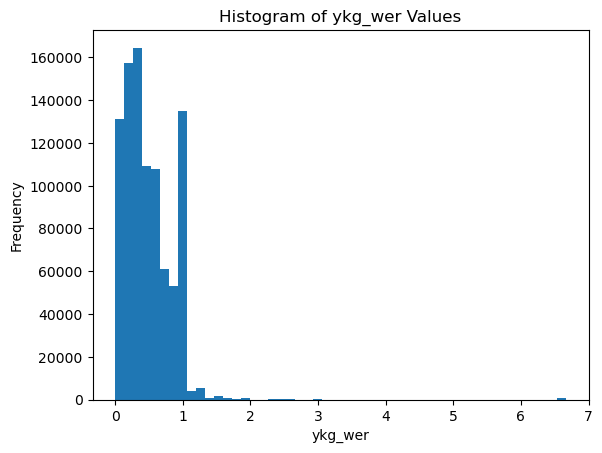

In [6]:
ykg_wer_values = df['ykg_wer']

plt.hist(ykg_wer_values, bins=50)
plt.title('Histogram of ykg_wer Values')
plt.xlabel('ykg_wer')
plt.ylabel('Frequency')
plt.show()

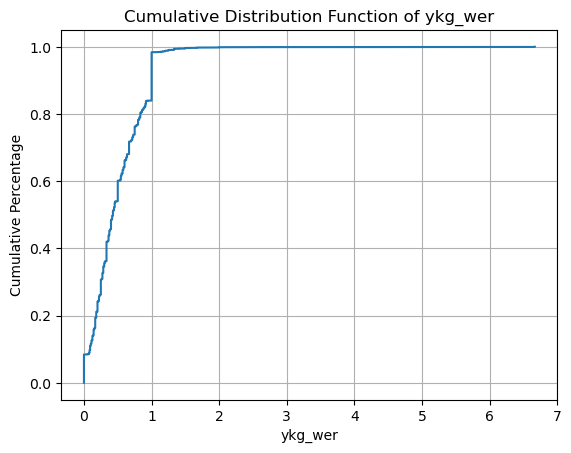

In [9]:
sorted_values = np.sort(ykg_wer_values)
cumulative_percentages = np.arange(len(sorted_values)) / float(len(sorted_values))

plt.plot(sorted_values, cumulative_percentages)
plt.title('Cumulative Distribution Function of ykg_wer')
plt.xlabel('ykg_wer')
plt.ylabel('Cumulative Percentage')
plt.grid(True)
plt.show()

In [10]:
filtered_ids = df.loc[(df['ykg_wer'] >= 0.2) & (df['ykg_wer'] <= 0.8), 'id']
filtered_ids.to_csv('filtered_ids.csv', index=False)

In [11]:
len(filtered_ids)

533556

In [12]:
train_df = pd.read_csv('train.csv')
train_df

,id,sentence,split
0,000005f3362c,ও বলেছে আপনার ঠিকানা!,train
1,00001dddd002,কোন মহান রাষ্ট্রের নাগরিক হতে চাও?,train
2,00001e0bc131,"আমি তোমার কষ্টটা বুঝছি, কিন্তু এটা সঠিক পথ না।",train
3,000024b3d810,নাচ শেষ হওয়ার পর সকলে শরীর ধুয়ে একসঙ্গে ভোজন...,train
4,000028220ab3,"হুমম, ওহ হেই, দেখো।",train
...,...,...,...
963631,ffffd07108b7,আপনার সাথে কথা বলতে চাই।,train
963632,ffffde37678a,সুতরাং পরের দিন আর-একটা ছবি না লইয়া চিত্রকর ছা...,train
963633,ffffe1b5f095,"সামাজিক কর্মকাণ্ডসমিতিতে গিয়ে দেখা যায়, শিল্পী...",train
963634,ffffec31636e,গুগল ম্যাপসের সাহায্যে খুঁজে পাওয়া যাবে কোন জা...,train


In [14]:
valid_train_df = train_df[train_df['split'] == 'valid']
valid_train_df

,id,sentence,split
20,0000e711c2b1,তিনি এবং তাঁর মা তাদের পৈতৃক বাড়িতে থেকে প্রত...,valid
59,00036c2a2d9d,কৃত্তিবাস রামায়ণ-বহির্ভূত অনেক গল্প এই অনুবাদ...,valid
100,00065e317123,তিনি তার সুশৃঙ্খল সামরিক বাহিনী এবং সুগঠিত শাস...,valid
101,00065f40df52,তিনি বিজয়নগর সাম্রাজ্যের বিরুদ্ধে এবং বিজাপুর...,valid
146,0009b022c8ea,এটি মূলত একটি মরুময় অঞ্চল।,valid
...,...,...,...
963545,fffa8ced44f1,এই কাজের জন্য বিশেষ পারদর্শিতা থাকা শিল্পী থাকে।,valid
963586,fffd69cdd76c,আবদুল লতিফ আঞ্জুমানের সঙ্গে প্রত্যক্ষভাবে জড়ি...,valid
963589,fffd9ff269bc,"পত্রের বিষয়বস্তু হলো ""যান্ত্রিক গণনার মডুলেশন...",valid
963593,fffdb13febaf,"তবে, ব্যান্ডটির অফিসিয়াল ফেসবুক পাতায়, তাকে ...",valid


In [16]:
merged_df = valid_train_df.merge(train_metadata_df, on='id', how='left')
merged_df

,id,sentence_x,split,filename,client_id,ggl_cer,ggl_mer,ggl_wer,ggl_wil,ggl_wip,google_preds,path,sentence_y,yellowking_preds,ykg_mer,ykg_wer,ykg_wil,ykg_wip,ykg_cer
0,0000e711c2b1,তিনি এবং তাঁর মা তাদের পৈতৃক বাড়িতে থেকে প্রত...,valid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00036c2a2d9d,কৃত্তিবাস রামায়ণ-বহির্ভূত অনেক গল্প এই অনুবাদ...,valid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00065e317123,তিনি তার সুশৃঙ্খল সামরিক বাহিনী এবং সুগঠিত শাস...,valid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00065f40df52,তিনি বিজয়নগর সাম্রাজ্যের বিরুদ্ধে এবং বিজাপুর...,valid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0009b022c8ea,এটি মূলত একটি মরুময় অঞ্চল।,valid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29583,fffa8ced44f1,এই কাজের জন্য বিশেষ পারদর্শিতা থাকা শিল্পী থাকে।,valid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29584,fffd69cdd76c,আবদুল লতিফ আঞ্জুমানের সঙ্গে প্রত্যক্ষভাবে জড়ি...,valid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29585,fffd9ff269bc,"পত্রের বিষয়বস্তু হলো ""যান্ত্রিক গণনার মডুলেশন...",valid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29586,fffdb13febaf,"তবে, ব্যান্ডটির অফিসিয়াল ফেসবুক পাতায়, তাকে ...",valid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's run NISQA on the validation set because we know it's high quality


python run_predict.py --mode predict_csv --pretrained_model weights/nisqa.tar --csv_file files.csv --csv_deg column_name_of_filepaths --num_workers 0 --bs 10 --output_dir /path/to/dir/with/results

In [33]:
valid_train_df['filepath'] = 'valid_train_wavs/' + valid_train_df['id'].astype(str) + '.wav'


csv_data = valid_train_df[['id', 'filepath']]
csv_data.to_csv('id_filepath.csv', index=False)
csv_data

/tmp/ipykernel_1205/3072438809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_train_df['filepath'] = 'train_mp3s/' + valid_train_df['id'].astype(str) + '.mp3'


,id,filepath
20,0000e711c2b1,train_mp3s/0000e711c2b1.mp3
59,00036c2a2d9d,train_mp3s/00036c2a2d9d.mp3
100,00065e317123,train_mp3s/00065e317123.mp3
101,00065f40df52,train_mp3s/00065f40df52.mp3
146,0009b022c8ea,train_mp3s/0009b022c8ea.mp3
...,...,...
963545,fffa8ced44f1,train_mp3s/fffa8ced44f1.mp3
963586,fffd69cdd76c,train_mp3s/fffd69cdd76c.mp3
963589,fffd9ff269bc,train_mp3s/fffd9ff269bc.mp3
963593,fffdb13febaf,train_mp3s/fffdb13febaf.mp3


In [43]:
import os
import shutil

# Directory path to store the copied files
output_directory = 'valid_train_mp3s'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Iterate over the 'filepath' column in valid_train_df
for filepath in valid_train_df['filepath']:
    if filepath.endswith('.mp3'):
        # Extract the filename from the filepath
        filename = os.path.basename(filepath)

        # Construct the destination path
        destination_path = os.path.join(output_directory, filename)

        # Copy the file to the destination path
        shutil.copy(filepath, destination_path)

        print(f"Copied {filename} to {output_directory}")

print("Copying complete.")

Copied 0000e711c2b1.mp3 to valid_train_mp3s
Copied 00036c2a2d9d.mp3 to valid_train_mp3s
Copied 00065e317123.mp3 to valid_train_mp3s
Copied 00065f40df52.mp3 to valid_train_mp3s
Copied 0009b022c8ea.mp3 to valid_train_mp3s
Copied 000b54ab9fd0.mp3 to valid_train_mp3s
Copied 000d50ba853a.mp3 to valid_train_mp3s
Copied 000e1cb60185.mp3 to valid_train_mp3s
Copied 000f52d17f9c.mp3 to valid_train_mp3s
Copied 000fb02d3aca.mp3 to valid_train_mp3s
Copied 0012a4506205.mp3 to valid_train_mp3s
Copied 001580fa2919.mp3 to valid_train_mp3s
Copied 0017ac90f857.mp3 to valid_train_mp3s
Copied 001d6dc0fe48.mp3 to valid_train_mp3s
Copied 001f20321efd.mp3 to valid_train_mp3s
Copied 0021147cdc91.mp3 to valid_train_mp3s
Copied 00227b240a0e.mp3 to valid_train_mp3s
Copied 0022fe8aa136.mp3 to valid_train_mp3s
Copied 0024e6237533.mp3 to valid_train_mp3s
Copied 00287a416cb9.mp3 to valid_train_mp3s
Copied 0028aae2942e.mp3 to valid_train_mp3s
Copied 002984bdef0b.mp3 to valid_train_mp3s
Copied 002c62e4b38d.mp3 to valid

In [44]:
valid_count = len(os.listdir('valid_train_mp3s'))
valid_count

29588

In [46]:
from pydub import AudioSegment

# Directory path containing the MP3 files
mp3_directory = 'valid_train_mp3s'

# Directory path to store the converted WAV files
wav_directory = 'valid_train_wavs'

# Create the output directory if it doesn't exist
if not os.path.exists(wav_directory):
    os.makedirs(wav_directory)

# Iterate over the files in the MP3 directory
for filename in os.listdir(mp3_directory):
    if filename.endswith('.mp3'):
        # Load the MP3 file
        mp3_path = os.path.join(mp3_directory, filename)
        audio = AudioSegment.from_file(mp3_path, format='mp3')

        # Construct the output WAV file path
        wav_filename = os.path.splitext(filename)[0] + '.wav'
        wav_path = os.path.join(wav_directory, wav_filename)

        # Export the audio as WAV
        audio.export(wav_path, format='wav')

        print(f"Converted {filename} to {wav_filename}")

print("Conversion complete.")

Converted 0000e711c2b1.mp3 to 0000e711c2b1.wav
Converted 00036c2a2d9d.mp3 to 00036c2a2d9d.wav
Converted 00065e317123.mp3 to 00065e317123.wav
Converted 00065f40df52.mp3 to 00065f40df52.wav
Converted 0009b022c8ea.mp3 to 0009b022c8ea.wav
Converted 000b54ab9fd0.mp3 to 000b54ab9fd0.wav
Converted 000d50ba853a.mp3 to 000d50ba853a.wav
Converted 000e1cb60185.mp3 to 000e1cb60185.wav
Converted 000f52d17f9c.mp3 to 000f52d17f9c.wav
Converted 000fb02d3aca.mp3 to 000fb02d3aca.wav
Converted 0012a4506205.mp3 to 0012a4506205.wav
Converted 001580fa2919.mp3 to 001580fa2919.wav
Converted 0017ac90f857.mp3 to 0017ac90f857.wav
Converted 001d6dc0fe48.mp3 to 001d6dc0fe48.wav
Converted 001f20321efd.mp3 to 001f20321efd.wav
Converted 0021147cdc91.mp3 to 0021147cdc91.wav
Converted 00227b240a0e.mp3 to 00227b240a0e.wav
Converted 0022fe8aa136.mp3 to 0022fe8aa136.wav
Converted 0024e6237533.mp3 to 0024e6237533.wav
Converted 00287a416cb9.mp3 to 00287a416cb9.wav
Converted 0028aae2942e.mp3 to 0028aae2942e.wav
Converted 002